# Classifying emails as spam or not spam.


## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd

## Data Collection and Preprocessing

In [8]:
df=pd.read_csv('spam.csv')
df.shape[1]

2

In [43]:
#Check for missing values
print(df.isnull().sum())  # There are no null values

Category    0
Message     0
dtype: int64


In [44]:
df.drop_duplicates(inplace=True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Visualizing the Distribution of Spam vs Non-Spam Messages

<Axes: title={'center': 'Spam vs Non-Spam Count'}>

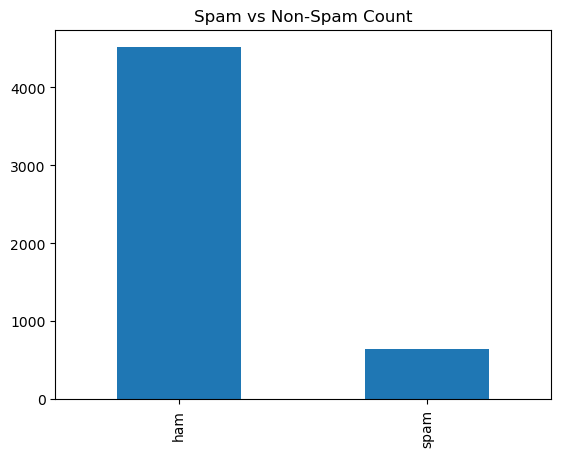

In [45]:
df['Category'].value_counts().plot(kind='bar', title="Spam vs Non-Spam Count")


## Encoding Labels (Spam → 1, Ham → 0)


In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Convert 'ham' -> 0 and 'spam' -> 1
df['Category'] = encoder.fit_transform(df['Category'])

## Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split
## Splitting Data into Training and Testing Sets
X = df['Message']  # Features (text data)
y = df['Category']  # Target (spam/ham)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


## Converting Text to Numerical Vectors Using TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

x_train_tfidf = vectorizer.fit_transform(x_train).toarray()
x_test_tfidf = vectorizer.transform(x_test).toarray()

## Model Training 

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(x_test_tfidf)

## Model Evaluations

In [50]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Model Accuracy: {accuracy:.2f}%")

print(classification_report(y_test, y_pred))

Model Accuracy: 95.64%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       909
           1       0.96      0.66      0.78       123

    accuracy                           0.96      1032
   macro avg       0.96      0.83      0.88      1032
weighted avg       0.96      0.96      0.95      1032

